In [5]:
# https://ai.plainenglish.io/fischers-linear-discriminant-analysis-in-python-from-scratch-bbe480497504
    
import numpy as np

class LDA():
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminant = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        class_labels = np.unique(y)
        
        # S_W, S_B
        mean_total = np.mean(X, axis=0)
        
        S_W = np.zeros((n_features, n_features))
        S_B = np.zeros((n_features, n_features))

        
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            S_W = S_W + (X_c - mean_c).T.dot(X_c - mean_c)
            
            n_c = n_samples
            mean_diff = (mean_c - mean_total).reshape(n_features, 1)
            S_B = S_B + n_samples * (mean_diff).dot(mean_diff.T)
            
        A = np.linalg.inv(np.float64(S_W)).dot(S_B)
        A = np.array(A, dtype=float)
        eigenvalues, eigenvectors = np.linalg.eig(A)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.linear_discriminant = eigenvectors[0:self.n_components]
        
        
    
    def transform(self, X):
        # Project data
        return np.dot(X, self.linear_discriminant.T)

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv('data_clean.csv', index_col=False)
df.drop('id',axis=1, inplace=True)
df.drop('Unnamed: 0',axis=1, inplace=True)

#Assign predictors to a variable of ndarray (matrix) type
array = df.values
X = array[:,1:31]
y = array[:,0]

#transform the class labels from their original string representation (M and B) into integers
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)


##Split data set in train 67% and test 33%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((381, 30), (381,), (188, 30), (188,))

Shape of X:  (381, 30)
Shape of transformed X:  (188, 2)


TypeError: can't convert complex to float

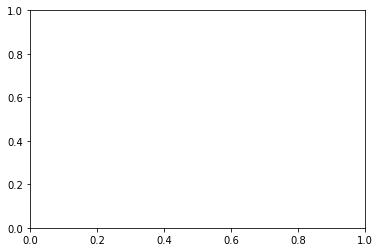

In [3]:
lda = LDA(2)
lda.fit(X_train, y_train)
X_projected = lda.transform(X_test)

print("Shape of X: ",X_train.shape)
print("Shape of transformed X: ",X_projected.shape)

x1 = X_projected[:,0]
x2 = X_projected[:,1]

plt.scatter(x1, x2, c=y_test, edgecolor='none', alpha=0.8)

plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar()
plt.show()

## Visualizing Training Set Results

TypeError: Shapes of x (3157, 2242) and z (188, 2) do not match

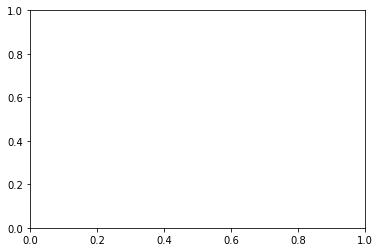

In [48]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))

# X2_set, y2_set = X_test, y_test
# X11, X22 = np.meshgrid(np.arange(start = X2_set[:,0].min() - 1, stop = X2_set[:,0].max() + 1, step = 0.01),
#                     np.arange(start = X2_set[:,1].min() - 1, stop = X2_set[:,1].max() + 1, step = 0.01))
# print(np.array([X1.ravel(), X2.ravel()]).T.shape)
# print(X1.shape)
plt.contourf(X1, X2, lda.transform(X_test),
            alpha = 0.75, cmap = ListedColormap(('red','green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title("Fisher's Linear Discriminant Analysis")
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend()
plt.show()

Shape of X:  (381, 30)
Shape of transformed X:  (188, 2)


TypeError: can't convert complex to float

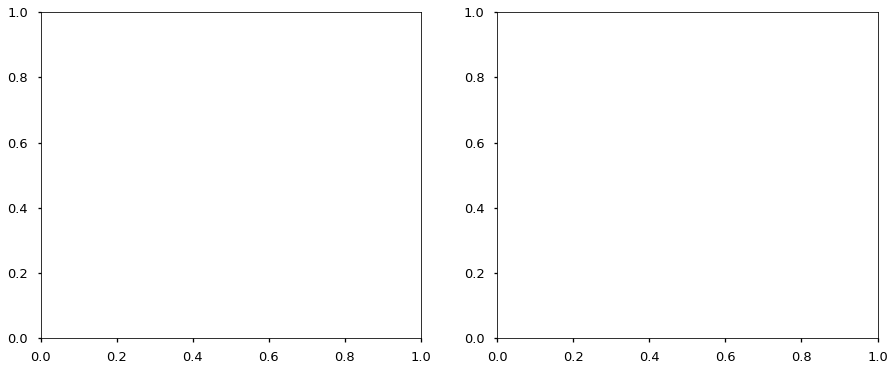

In [52]:
lda = LDA(2)
lda.fit(X_train, y_train)
X_r_lda = lda.transform(X_test)
y = y_test

print("Shape of X: ",X_train.shape)
print("Shape of transformed X: ",X_projected.shape)

x1 = X_projected[:,0]
x2 = X_projected[:,1]

with plt.style.context('seaborn-talk'):
    fig, axes = plt.subplots(1,2,figsize=[15,6])
    colors = ['navy', 'turquoise', 'darkorange']
    for color, i, target_name in zip(colors, [0, 1, 2], [0,1]):
        axes[0].scatter(X_r_lda[y == i, 0], X_r_lda[y == i, 1], alpha=.8, label=target_name, color=color)
        axes[1].scatter(X_r_pca[y == i, 0], X_r_pca[y == i, 1], alpha=.8, label=target_name, color=color)
    axes[0].title.set_text('LDA for Wine dataset')
    axes[1].title.set_text('PCA for Wine dataset')
    axes[0].set_xlabel('Discriminant Coordinate 1')
    axes[0].set_ylabel('Discriminant Coordinate 2')
    axes[1].set_xlabel('PC 1')
    axes[1].set_ylabel('PC 2')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


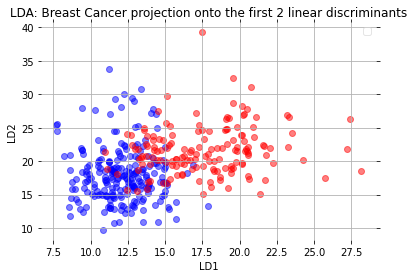

In [7]:
def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,2),('m', 'b'),('blue', 'red')):

        plt.scatter(x=X_train[:,0].real[y_train == label],
                y=X_train[:,1].real[y_train == label],
                color=color,
                alpha=0.5,
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Breast Cancer projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()